 # <font color='red' style='font-family:font_family name'><center> ---Churn Problem--- </center></font>

We chose to use the CRISP methodology which is broken down into 6 steps: Business Understanding ==> Data Understanding ==> Data Preparation ==> Modeling ==> Evaluation ==> Deployment

 ## <font color='blue'> 1- Business Understanding </font>


Telecommunication industries are trying to develop ways to predict customers who have the potential to churn so that action can be taken to prevent it because of the effect of direct churn on the decline in company revenue. Churn activity is very influential on total profits and business image, so it is better if it can be predicted and prevented. Churn prediction can be used to identify churners early before they move, and can help the CRM (Customer Relationship Management) department to retain them, so that the potential loss of the company can be avoided. Thereby the service providers must optimize the performance of churn prediction model and employ churn prediction techniques and apply appropriate marketing strategies to retain the existing subscriber. The customer churn prediction is an important business strategy for the company. By predicting customer churn, companies can immediately take action to retain customers.

 ## <font color='blue'> 2- Data Understanding</font>


In [162]:
#Importing useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [163]:
#Loading data frame 
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#The first 3 rows of our dataframe
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [164]:
#Feature list
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [165]:
#Information about our DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [166]:
#The number of observations and features
df.shape

(7043, 21)

In [167]:
#Verifying if there is null values in our dataframe
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [168]:
#Visualizing some basic statistical details like median, mean, std etc
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [169]:
#Quantitative comparison between the mean and the median
abs((df.mean()-df.median())/df.mean())

SeniorCitizen     1.000000
tenure            0.104141
MonthlyCharges    0.086290
dtype: float64

### <font color='orange'> About the target variable "churn" : </font>

In [170]:
#Observation of the values of the target variable "churn"
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

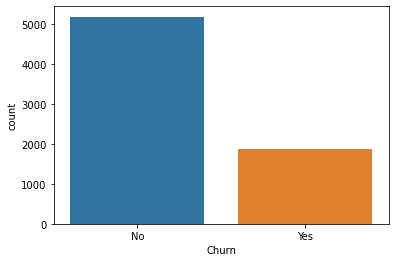

In [171]:
sns.countplot(x=df["Churn"])

###  <font color='orange'> About the categorical feature "gender" : </font>

<AxesSubplot:xlabel='gender', ylabel='count'>

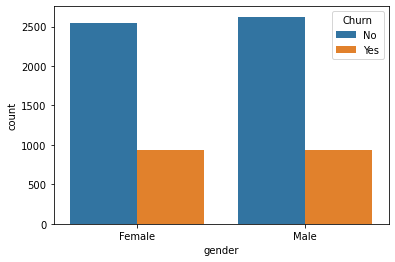

In [172]:
sns.countplot(x="gender",hue="Churn",data=df)

- Nothing can be concluded since the percentage of unsubscribed men is almost equal to the number of unsubscribed women.

###  <font color='orange'> About the categorical feature "SeniorCitizen" : </font>

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

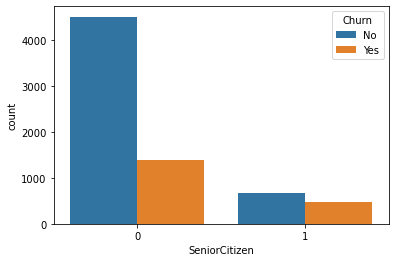

In [173]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

In [174]:
pd.crosstab(df["SeniorCitizen"],df["Churn"])

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


- we notice that 42% of Senior Citizens churned while 23% of Junior Citizens did. In addition, we notice that the number of Junior Citizens who have left is much bigger than the number of Senior Citizens.

###  <font color='orange'> About the categorical feature "Partner" : </font>

<AxesSubplot:xlabel='Partner', ylabel='count'>

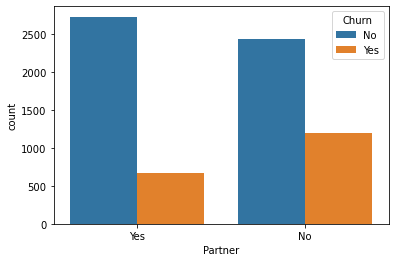

In [175]:
sns.countplot(x="Partner",hue="Churn",data=df)

- we notice that the number of churns which have a partner are more than the churns which do not have a partner.

###  <font color='orange'> About the categorical feature "Dependents" : </font>

<AxesSubplot:xlabel='Dependents', ylabel='count'>

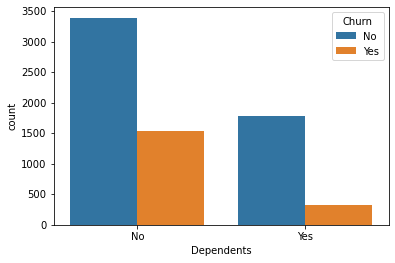

In [176]:
sns.countplot(x="Dependents",hue="Churn",data=df)

- We notice a big difference between the non-dependent churns and the dependent churns moreover the dependents contains a very small number of churns that we can neglect if compared with the number of non-dependents

###  <font color='orange'> About the categorical feature "PhoneService" : </font>

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

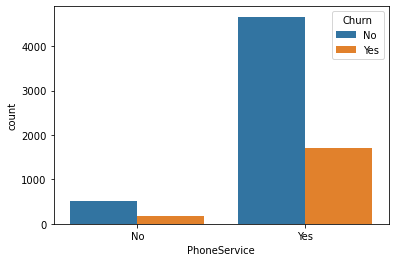

In [177]:
sns.countplot(x="PhoneService",hue="Churn",data=df)

- We notice that the number of churn for those who have a phone service is very large compared to those who do not have a phone service but after a percentage calculation we notice that the percentage for those who have a phone service is almost equal (26%) to those who do not have a phone service so we can delete this column.

In [178]:
pd.crosstab(df["PhoneService"],df["Churn"])

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


###  <font color='orange'> About the categorical feature "MultipleLines" : </font>

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

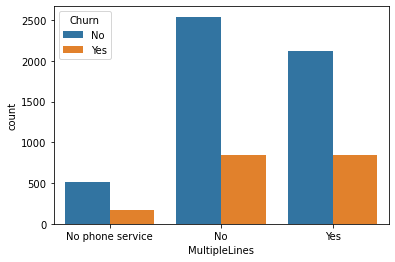

In [179]:
sns.countplot(x="MultipleLines",hue="Churn",data=df)

In [180]:
pd.crosstab(df["MultipleLines"],df["Churn"])

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


- Similarly we will delete this column since the percentage of churns for the different categories is almost equal to (25%)
therefore this column has no impact.

###  <font color='orange'> About the categorical feature "InternetService" : </font>

<AxesSubplot:xlabel='InternetService', ylabel='count'>

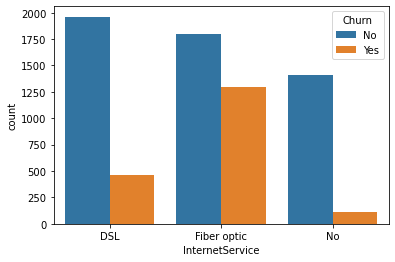

In [181]:
sns.countplot(x="InternetService",hue="Churn",data=df)

In [182]:
pd.crosstab(df["InternetService"],df["Churn"])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


- We notice a big difference in terms of percentage especially between the churns which used dsl (19%) and the churns which used the optical fiber (42%) also we have a low percentage of the churns which did not have internet (7.5%) so we can conclude that this column gives a lot of information about the churn status.

###  <font color='orange'> About the categorical feature "OnlineSecurity" : </font>

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

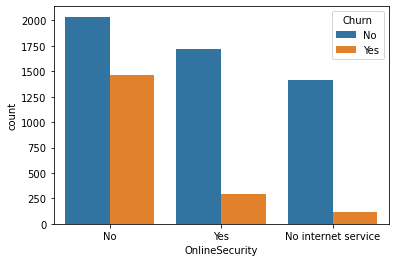

In [183]:
sns.countplot(x="OnlineSecurity",hue="Churn",data=df)

- Those who don't have an online Security are the largest in terms of churn percentage.

###  <font color='orange'> About the categorical feature "OnlineBackup" : </font>

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

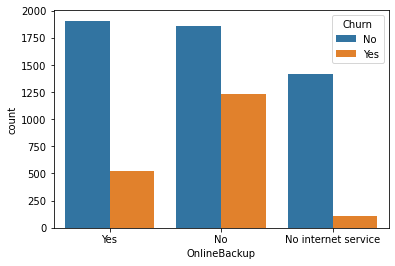

In [184]:
sns.countplot(x="OnlineBackup",hue="Churn",data=df)

- Those who don't have an online backup are the largest in terms of churn percentage.

###  <font color='orange'> About the categorical feature "DeviceProtection" : </font>

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

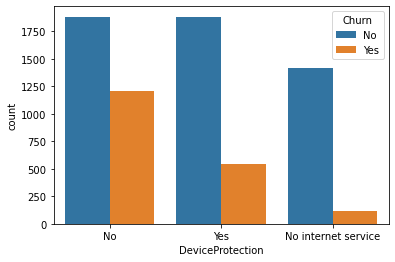

In [185]:
sns.countplot(x="DeviceProtection",hue="Churn",data=df)

- It can be concluded that most of the people who leave are the one who do not have a device protection.

###  <font color='orange'> About the categorical feature "TechSupport" : </font>

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

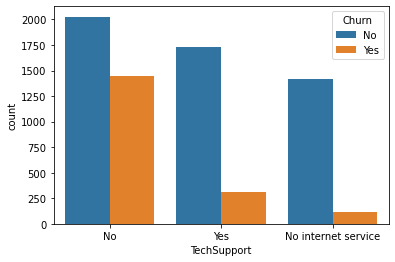

In [186]:
sns.countplot(x="TechSupport",hue="Churn",data=df)

- We can conclude that most of the people who leave are those who do not have tech support.

###  <font color='orange'> About the categorical feature "StreamingTV" : </font>

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

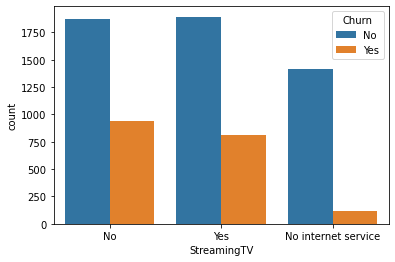

In [187]:
sns.countplot(x="StreamingTV",hue="Churn",data=df)

We notice that most of the people who leave are those who have internet service. moreover the percentage of churns that have TV streaming is almost equal to the churns who don't.

###  <font color='orange'> About the categorical feature "StreamingMovies" : </font>

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

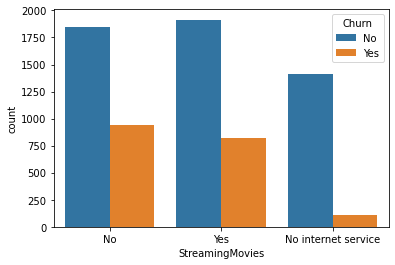

In [188]:
sns.countplot(x="StreamingMovies",hue="Churn",data=df)

- We notice that most of the people who leave are those who have internet service. moreover the percentage of churns who have streaming Movies is almost equal to churns who don't.

###  <font color='orange'> About the categorical feature "Contract" : </font>

<AxesSubplot:xlabel='Contract', ylabel='count'>

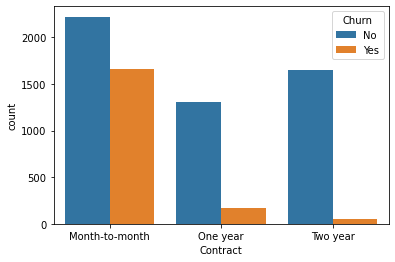

In [189]:
sns.countplot(x="Contract",hue="Churn",data=df)

- We notice that most of the churns are those who have the month to month contract after that we find the annual contract and the smallest percentage is that of two years contract.

###  <font color='orange'> About the categorical feature "PaperlessBilling" : </font>

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

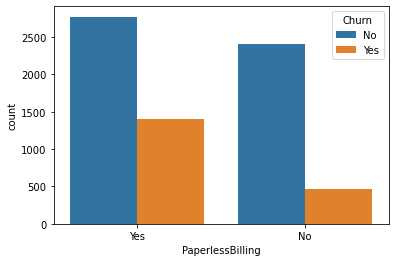

In [190]:
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)

In [191]:
#facturation sans papier
#no 16%
#yes 33%
pd.crosstab(df["PaperlessBilling"],df["Churn"])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


- We notice that most of the people who leave are those who have a paperless billing.

###  <font color='orange'> About the categorical feature "PaymentMethod" : </font>

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

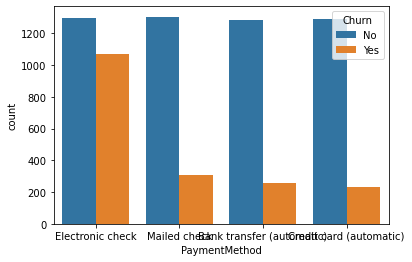

In [192]:
sns.countplot(x="PaymentMethod",hue="Churn",data=df)

- We notice that most of the churns are the people who pay with the electronic bank after that we find the method mailed check and the smallest percentages are those of bank transfer and credit card.

## <font color='blue'> 3- Data Preparation </font>

## <font color='violet'> 3-1 Removing columns</font>

In [193]:
#Deletion of unnecessary features
df.drop(columns=['customerID',
         'gender', 'PhoneService',
       'MultipleLines', 'TotalCharges'],axis=1,inplace=True)

In [194]:
#The list of the remaining features
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [195]:
#The number of observations and features after dropping some features
df.shape

(7043, 16)

## <font color='violet'> 3-2 preparation of x and y</font>

In [196]:
#The separation between the target variable and the rest of the features
y = df.iloc[:, 15].values
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [197]:
X = df.drop(['Churn'],axis=1)
X

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,1,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


## <font color='violet'> 3-3 Encoding </font>

In [198]:
#Importing useful modules
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [199]:
#The names of the features
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [200]:
#Transforming values of the target variables from categorical to binary
labelencoder_y = LabelEncoder()
y =  labelencoder_y.fit_transform(y)

In [201]:
#Categorical variable encoding
onehotencoder =ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto',drop='first'), ['SeniorCitizen',
                      'Partner', 
                      'Dependents',
                      'OnlineSecurity',
                      'InternetService',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'Contract',
                      'PaperlessBilling', 
                      'PaymentMethod'])],   
    remainder='passthrough'                                         
)
X = onehotencoder.fit_transform(X)

In [202]:
#Visualisation of the target variables after encoding
y

array([0, 0, 1, ..., 0, 1, 0])

In [203]:
#Visualization of the features after encoding
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34.0,56.95
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,53.85
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0,42.30
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,24.0,84.80
7039,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,72.0,103.20
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0,29.60
7041,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,74.40


## <font color='violet'> 3-4 Features Selection </font>

In [204]:
#Doing a features selection based on the variance
from sklearn.feature_selection import VarianceThreshold
selecteur = VarianceThreshold(threshold=0.02)
selecteur.fit_transform(X)
selecteur.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

## <font color='violet'> 3-5 Train data and test data </font>

In [205]:
#Divising X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3, stratify = y)

In [206]:
#The dimensions of X_train
X_train.shape

(5634, 25)

In [207]:
#The dimensions of y_train
y_train.shape

(5634,)

In [208]:
#The dimensions of X_test
X_test.shape

(1409, 25)

In [209]:
#The dimensions of y_test
y_test.shape

(1409,)

## <font color='violet'>3-6 Normalization</font>

In [210]:
#Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [211]:
#Visualization of X_train after scaling
X_train

array([[-0.44033738,  1.04021147,  1.54329281, ..., -0.54877567,
        -0.89888281, -1.49690929],
       [-0.44033738,  1.04021147,  1.54329281, ..., -0.54877567,
        -0.93947064,  0.84551773],
       [ 2.27098592,  1.04021147, -0.64796518, ..., -0.54877567,
        -0.65535584,  1.12540944],
       ...,
       [-0.44033738,  1.04021147, -0.64796518, ..., -0.54877567,
        -0.69594366,  0.77221276],
       [-0.44033738,  1.04021147,  1.54329281, ..., -0.54877567,
         1.45521126,  0.80220116],
       [ 2.27098592, -0.96134298, -0.64796518, ..., -0.54877567,
         1.61756257, -1.31864493]])

## <font color='blue'> 4- Modeling </font>

## <font color='violet'> 4-1 XGBoost</font>

## <font color='pink'> 4-1-1  Model training </font>

In [212]:
#Importing the model
from xgboost import XGBClassifier

In [213]:
#applying model
xg = XGBClassifier(use_label_encoder=False)

In [214]:
#Model training
xg.fit(X_train , y_train)

[18:06:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [215]:
#Visualizing train and test score
print("The train score is ", xg.score(X_train, y_train))
print("The test score is ", xg.score(X_test, y_test))

The train score is  0.922790202342918
The test score is  0.7814052519517388


- We notice that the train score and the test score are very far from each other. We are in the case of over_fitting.

## <font color='pink'> 4-1-2 Model evaluation  </font>

In [216]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [217]:
#The compute of predicted y and the confusion matrix
y_pred = xg.predict(X_test)
print(confusion_matrix(y_test, y_pred)) 

[[923 112]
 [196 178]]


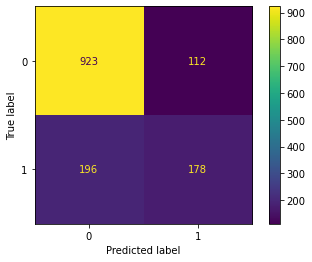

In [218]:
#Visualizing the confusion matrix
from sklearn.tree import plot_tree
plot_confusion_matrix(xg, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 923 <br/>
                                      TN = we predicted that the customer will churn and that's right : 178<br/>
                                      FP = we predicted that he will churn but he will stay : 112<br/>
                                      FN = we predicted that he will stay but he will churn : 196}<br/>

In [219]:
#Visualizing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.824844  0.891787  0.857010      1035
           1   0.613793  0.475936  0.536145       374

    accuracy                       0.781405      1409
   macro avg   0.719318  0.683862  0.696577      1409
weighted avg   0.768823  0.781405  0.771841      1409



## <font color='violet'> 4-2 KNN</font>

## <font color='pink'> 4-2-1 Model training </font>

In [220]:
#Importing the model
from sklearn.neighbors import KNeighborsClassifier

In [221]:
#applying model
knn=KNeighborsClassifier()

In [222]:
#Model training
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [223]:
#Visualizing train and test score
print("The train score is ", knn.score(X_train, y_train))
print("The test score is ", knn.score(X_test, y_test))

The train score is  0.8320908768193114
The test score is  0.7473385379701917


- We notice that the train score and the test score are far from each other.

## <font color='pink'> 4-2-2 Model evaluation  </font>

In [224]:
#The compute of predicted y and the confusion matrix
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred)) 

[[880 155]
 [201 173]]


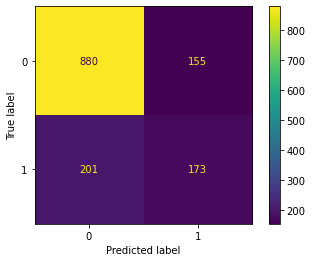

In [225]:
#Visualizing the confusion matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 880 <br/>
                                      TN = we predicted that the customer will churn and that's right : 173<br/>
                                      FP = we predicted that he will churn but he will stay : 155<br/>
                                      FN = we predicted that he will stay but he will churn : 201}<br/>

In [226]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.814061  0.850242  0.831758      1035
           1   0.527439  0.462567  0.492877       374

    accuracy                       0.747339      1409
   macro avg   0.670750  0.656404  0.662318      1409
weighted avg   0.737981  0.747339  0.741807      1409



## <font color='violet'> 4-3 DECISION TREE </font>

## <font color='pink'> 4-3-1 Model training </font>

In [227]:
#Importing the model
from sklearn.tree import DecisionTreeClassifier

In [228]:
#applying model
dt = DecisionTreeClassifier(random_state=0)

In [229]:
#Model training
dt.fit(X_train , y_train)

DecisionTreeClassifier(random_state=0)

In [230]:
#Visualizing train and test score
print("The train score is ", dt.score(X_train, y_train))
print("The test score is ", dt.score(X_test, y_test))

The train score is  0.9968051118210862
The test score is  0.7224982256919801


- We notice that the train score and the test score are very far from each other. We are in the case of over_fitting.

## <font color='pink'> 4-3-2 Model evaluation </font>

In [231]:
#The compute of predicted y and the confusion matrix
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[842 193]
 [198 176]]


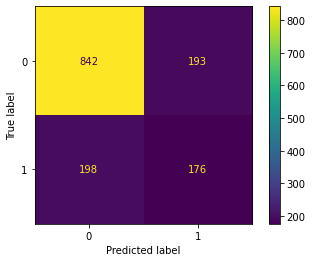

In [232]:
#Visualizing the confusion matrix
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 842 <br/>
                                      TN = we predicted that the customer will churn and that's right : 176<br/>
                                      FP = we predicted that he will churn but he will stay : 193<br/>
                                      FN = we predicted that he will stay but he will churn : 198}<br/>

In [233]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.809615  0.813527  0.811566      1035
           1   0.476965  0.470588  0.473755       374

    accuracy                       0.722498      1409
   macro avg   0.643290  0.642057  0.642661      1409
weighted avg   0.721318  0.722498  0.721899      1409



## <font color='violet'> 4-4 Logistic Regression</font>

## <font color='pink'> 4-4-1 Model training </font>

In [234]:
#Importing the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [235]:
#applying model
logreg = LogisticRegression(random_state=0)

In [236]:
#Model training
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [237]:
#Visualizing train and test score
print("The train score is ", logreg.score(X_train, y_train))
print("The test score is ", logreg.score(X_test, y_test))

The train score is  0.8074192403265885
The test score is  0.7906316536550745


- We notice that the train score and the test score are very close.

## <font color='pink'> 4-4-2 Model evaluation  </font>

In [238]:
#The compute of predicted y and the confusion matrix
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[926 109]
 [186 188]]


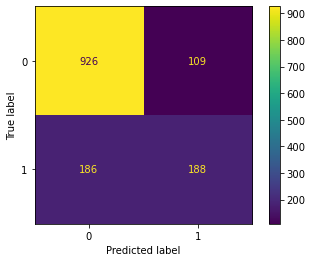

In [239]:
#Visualizing the confusion matrix
plot_confusion_matrix(logreg, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 926 <br/>
                                      TN = we predicted that the customer will churn and that's right : 188<br/>
                                      FP = we predicted that he will churn but he will stay : 109<br/>
                                      FN = we predicted that he will stay but he will churn : 186}<br/>

In [240]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.832734  0.894686  0.862599      1035
           1   0.632997  0.502674  0.560358       374

    accuracy                       0.790632      1409
   macro avg   0.732865  0.698680  0.711478      1409
weighted avg   0.779716  0.790632  0.782373      1409



## <font color='violet'> 4-5 Random Forest</font>

## <font color='pink'> 4-5-1 Model training </font>

In [241]:
#Importing the model
from sklearn.ensemble import RandomForestClassifier

In [242]:
#applying model
rf = RandomForestClassifier(random_state=0)

In [243]:
#Model training
rf.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [244]:
#Visualizing train and test score
print("The train score is ", rf.score(X_train, y_train))
print("The test score is ", rf.score(X_test, y_test))

The train score is  0.9966276180333689
The test score is  0.7750177430801988


- We notice that the train score and the test score are very far from each other. We are in the case of over_fitting.

## <font color='pink'> 4-5-2 Model evaluation  </font>

In [245]:
#The compute of predicted y and the confusion matrix
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[921 114]
 [203 171]]


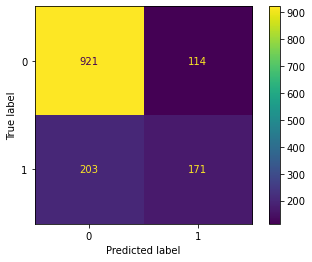

In [246]:
#Visualizing the confusion matrix
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 921 <br/>
                                      TN = we predicted that the customer will churn and that's right : 171<br/>
                                      FP = we predicted that he will churn but he will stay : 114<br/>
                                      FN = we predicted that he will stay but he will churn : 203}<br/>

In [247]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.819395  0.889855  0.853173      1035
           1   0.600000  0.457219  0.518968       374

    accuracy                       0.775018      1409
   macro avg   0.709698  0.673537  0.686070      1409
weighted avg   0.761160  0.775018  0.764463      1409



## <font color='violet'> 4-6 Naive Bayes</font>

## <font color='pink'> 4-6-1 Model training</font>

In [248]:
#Importing the model
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [249]:
#applying and training models
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, bayes in nb.items():
    s = cross_val_score(bayes, X_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.6627679073791846,
 'bernoulli': 0.7275510992102455,
 'multinomial': nan}

In [250]:
# model to keep
bayes = BernoulliNB()
bayes.fit(X_train, y_train)

BernoulliNB()

In [251]:
#Visualizing train and test score
print("The train score is ", bayes.score(X_train, y_train))
print("The test score is ", bayes.score(X_test, y_test))

The train score is  0.729144479943202
The test score is  0.7331440738112136


- We notice that the train score and the test score are very close.

## <font color='pink'> 4-6-2 Model evaluation  </font>


In [252]:
#The compute of predicted y and the confusion matrix
y_pred = bayes.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[746 289]
 [ 87 287]]


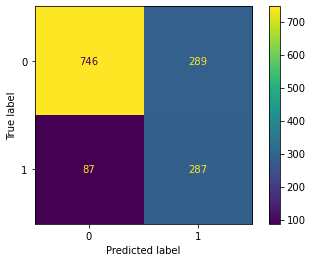

In [253]:
#Visualizing the confusion matrix
plot_confusion_matrix(bayes, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 746 <br/>
                                      TN = we predicted that the customer will churn and that's right : 287<br/>
                                      FP = we predicted that he will churn but he will stay : 289<br/>
                                      FN = we predicted that he will stay but he will churn : 87}<br/>

In [254]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.895558  0.720773  0.798715      1035
           1   0.498264  0.767380  0.604211       374

    accuracy                       0.733144      1409
   macro avg   0.696911  0.744076  0.701463      1409
weighted avg   0.790102  0.733144  0.747087      1409



## <font color='violet'> 4-7 Support Vector Machines</font>

## <font color='pink'> 4-7-1 Model training </font>

In [255]:
#Importing the model
from sklearn.svm import SVC # "Support vector classifier"

In [256]:
#applying model
svm = SVC(probability = True, random_state = 1)

In [257]:
#Model training
svm.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [258]:
#Visualizing train and test score
print("The train score is ", svm.score(X_train, y_train))
print("The test score is ", svm.score(X_test, y_test))

The train score is  0.8132765353212638
The test score is  0.78708303761533


- We notice that the train score and the test score are close.

## <font color='pink'> 4-7-2 Model evaluation  </font>


In [259]:
#The compute of predicted y and the confusion matrix
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[942  93]
 [207 167]]


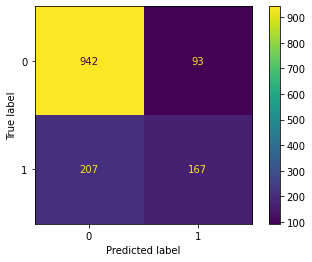

In [260]:
#Visualizing the confusion matrix
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 942 <br/>
                                      TN = we predicted that the customer will churn and that's right : 167<br/>
                                      FP = we predicted that he will churn but he will stay : 93<br/>
                                      FN = we predicted that he will stay but he will churn : 207}<br/>

In [261]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.819843  0.910145  0.862637      1035
           1   0.642308  0.446524  0.526814       374

    accuracy                       0.787083      1409
   macro avg   0.731076  0.678334  0.694726      1409
weighted avg   0.772719  0.787083  0.773498      1409



## <font color='blue'> 5- Final Evaluation </font>

## <font color='violet'> 5-1 comparison between models</font>

- List of each model and it's accuracy and f1 score: </br>

| Model | Accuracy | F1 score |
| --- | --- | --- |
| XGBoost | 0.7814 | 0.8547 |
| KNN | 0.7473 | 0.8317 |
| Decition Tree | 0.7224 | 0.8115 |
| Logistic Regression | 0.7906 | 0.8626 |
|Random Forest | 0.775 | 0.8532 |
|Naive Bayes | 0.7275 | 0.7987 |
| Support Vector Machines | 0.7870 | 0.8626 |

- we notice that the Logistic Regression model has the best accuracy and the best f1 score

<br> TPR = TP/(TP+FN) </br>
<br> FPR = FP/(FP+TN) </br>

In [262]:
from sklearn.metrics import roc_curve
y_scores = logreg.predict_proba(X_test) #the probabilities of p (x = 0) and p (x = 1)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1]) #FPR TPR and the different thresholds
y_scores1 = knn.predict_proba(X_test) 
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_scores1[:, 1]) 
y_scores2 = svm.predict_proba(X_test) 
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_scores2[:, 1]) 
y_scores3 = dt.predict_proba(X_test) 
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_scores3[:, 1]) 
y_scores4 = rf.predict_proba(X_test) 
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_scores4[:, 1]) 
y_scores5 = bayes.predict_proba(X_test) 
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_scores5[:, 1]) 
y_scores6 = xg.predict_proba(X_test) 
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_scores6[:, 1]) 

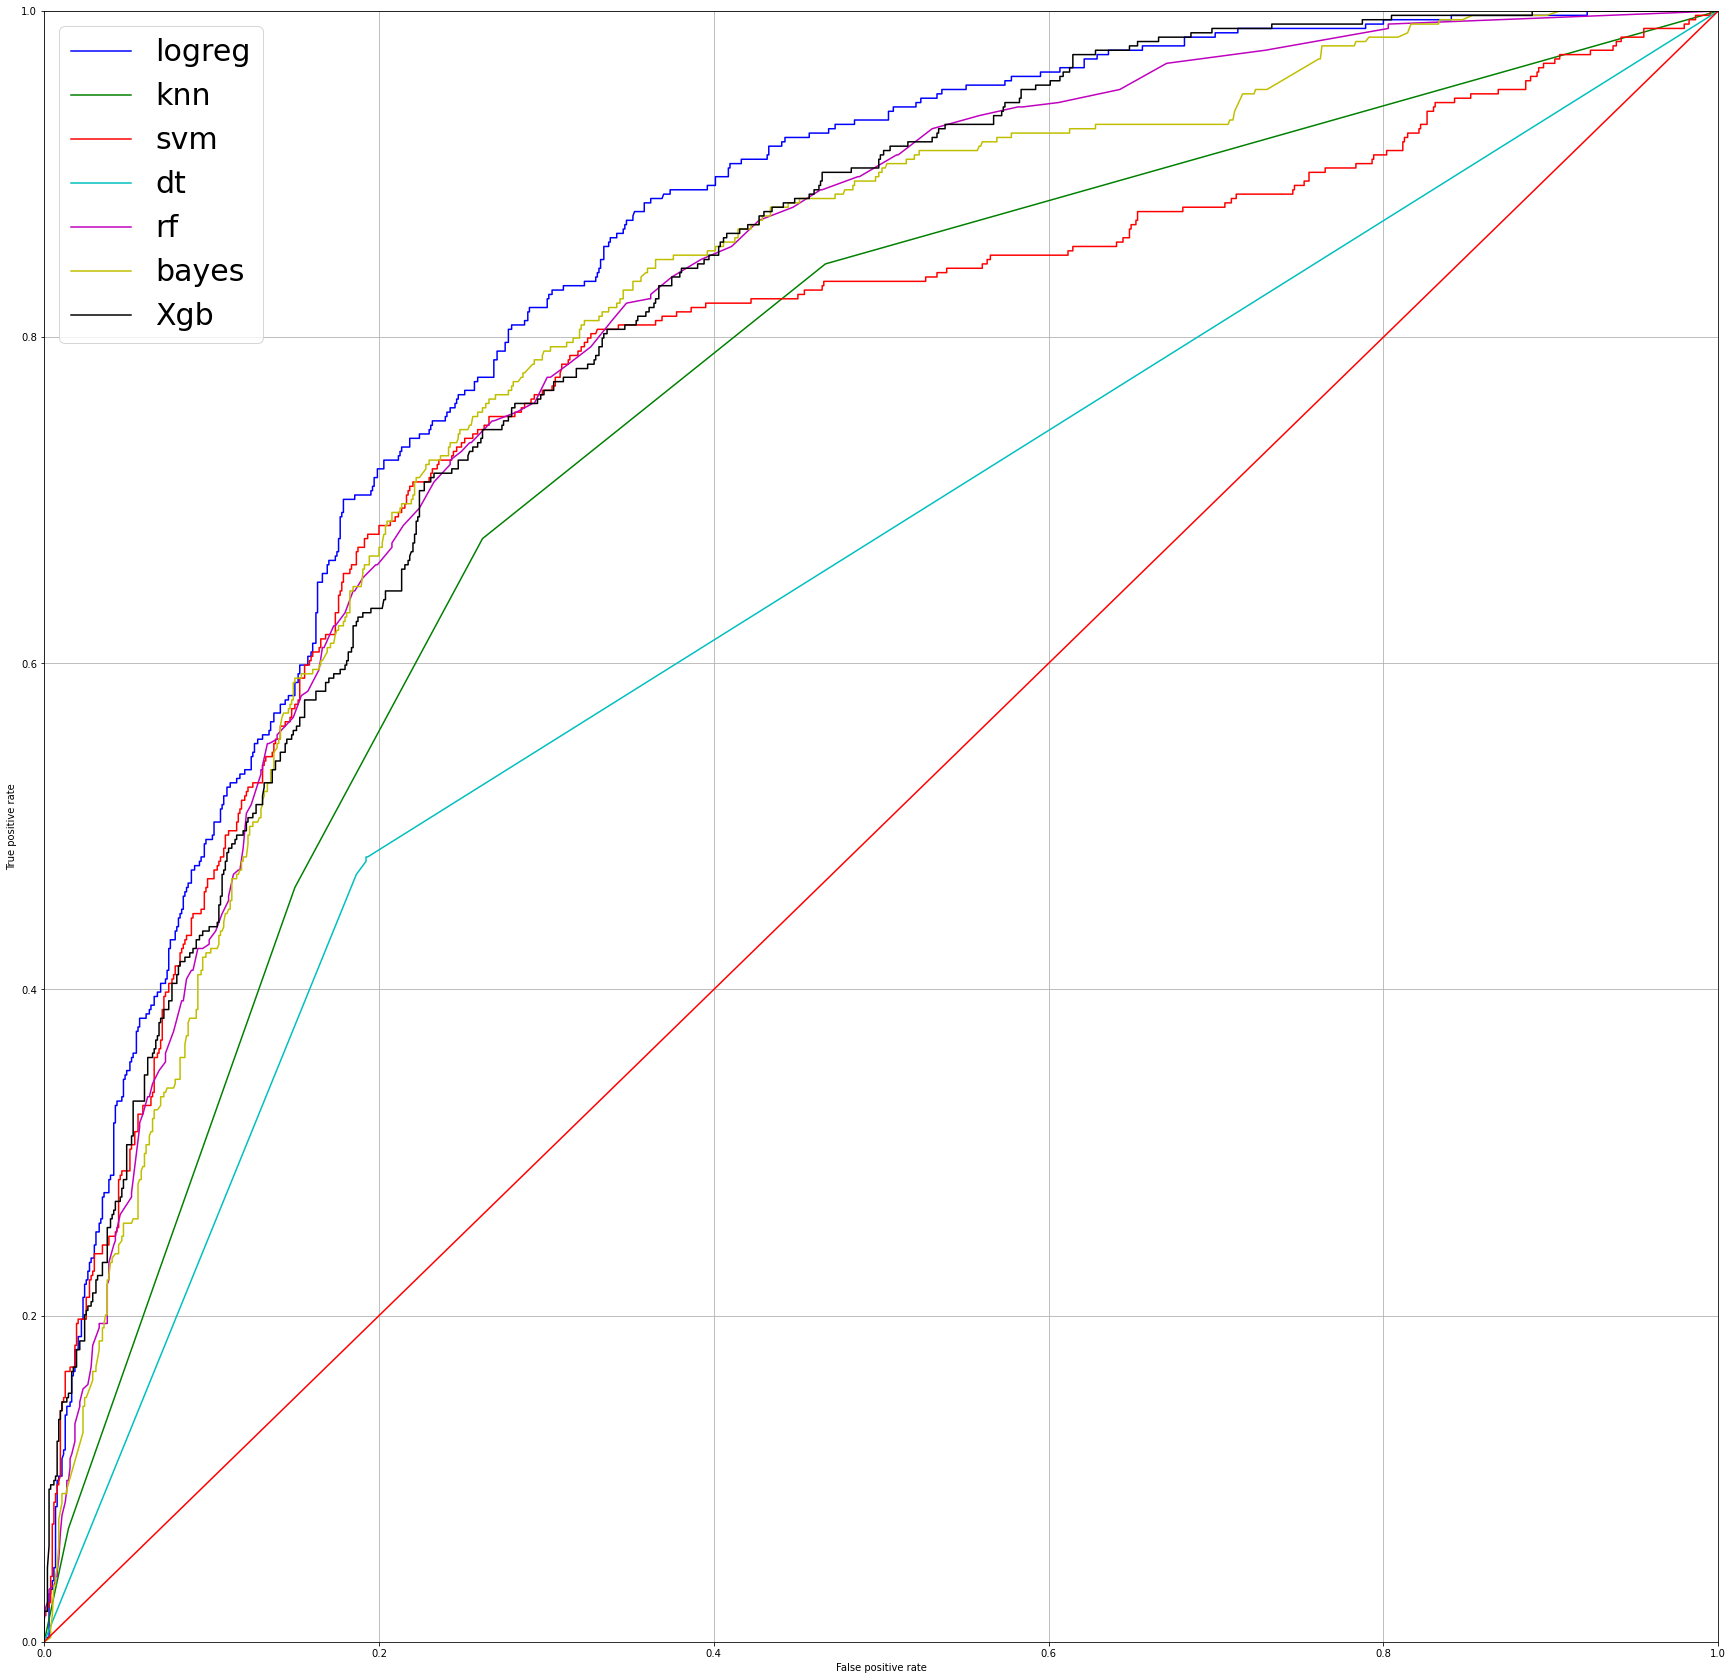

In [263]:
# Plotting of the TPR curve as a function of FPR    TPR= f(FPR)
plt.figure(figsize=(30,30))
plt.plot(fpr, tpr,'b', fpr1, tpr1, 'g', fpr2, tpr2, 'r', fpr3, tpr3, 'c', fpr4, tpr4, 'm', fpr5, tpr5, 'y', fpr6, tpr6, 'k')
plt.legend(('logreg','knn','svm','dt','rf','bayes','Xgb'),fontsize=30,loc=0)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

- we can see that the Logistic Regression model hase the best curve

 ### <font color='steelblue'> from what we have seen, we can conclude that the Logistic Regression model is the best. But still we will try to adjust the hyperparameters to improve the results.</font>

## <font color='violet'> 5-2 Hyperparameters tuning</font>

In [264]:
from sklearn.model_selection import GridSearchCV

#Applying model
log = LogisticRegression(random_state=0)

In [265]:
#Tuning of hyperparameters using GridSearchCV
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}
search = GridSearchCV(log,param_grid=param_grid,cv= 5,n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2....
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'max_iter': [100, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-

In [266]:
#The best parameters
search.best_params_

{'C': 0.30303030303030304,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [267]:
#Applying model with the new parameters
final_model = LogisticRegression(C=0.30303030303030304, max_iter=100, penalty='l2',solver='liblinear',
                   random_state=0)

In [268]:
#Model training
final_model.fit(X_train, y_train)

LogisticRegression(C=0.30303030303030304, random_state=0, solver='liblinear')

In [269]:
#Visualizing train and test score
print('The train score is ', final_model.score(X_train, y_train))
print('The test score is ', final_model.score(X_test, y_test))

The train score is  0.8068867589634363
The test score is  0.7920511000709723


## <font color='violet'> 5-3 Evaluation </font>

In [270]:
#The compute of predicted y and the confusion matrix
y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[927 108]
 [185 189]]


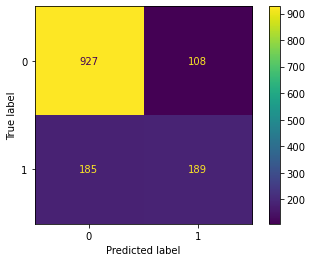

In [271]:
#Visualizing the confusion matrix
plot_confusion_matrix(final_model, X_test, y_test)
plt.show()

from the confusion matrix we have :<br/>
{TP = we predicted that the customer will not churn and that's right : 927 <br/>
                                      TN = we predicted that the customer will churn and that's right : 189<br/>
                                      FP = we predicted that he will churn but he will stay : 108<br/>
                                      FN = we predicted that he will stay but he will churn : 185}<br/>

In [272]:
#Visualizing the classification report
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.833633  0.895652  0.863531      1035
           1   0.636364  0.505348  0.563338       374

    accuracy                       0.792051      1409
   macro avg   0.734998  0.700500  0.713434      1409
weighted avg   0.781271  0.792051  0.783849      1409



### <font color='steelblue'> we notice that there is a slight impovement in the accuracy score going from 0.7906 to 0.792 and  in the f1 score going from 0.8626 to 0.8635. </font>